# **Import Libraries**

In [65]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

# **Load Dataset**

In [46]:
(train_data,train_label),(test_data,test_label) = reuters.load_data(num_words=10000)

In [47]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (8982,)
train_label :  (8982,)
test_data :  (2246,)
test_label :  (2246,)


In [48]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [49]:
train_label[0]

3

# **Decode one of these reviews back to English words**

In [50]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for key,value in word_index.items()])
decode_reverse_word_index = " ".join([reverse_word_index.get(i-3,"?") for i in train_data[0]])

In [51]:
decode_reverse_word_index

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

# **Encoding the integer sequence into a binary matrix**

In [52]:
def vectorize_sequence(sequence, dimension=10000):
  result = np.zeros((len(sequence), dimension))
  for i, sequence in enumerate(sequence):
    result[i,sequence] = 1.

  return result

train_data = vectorize_sequence(train_data)
test_data = vectorize_sequence(test_data)

In [53]:
print("train_data : ",train_data.shape)
print("test_data : ",test_data.shape)

train_data :  (8982, 10000)
test_data :  (2246, 10000)


# **Vectorize Label Data**

In [54]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [55]:
print("train_label : ",train_label.shape)
print("test_label : ",test_label.shape)

train_label :  (8982, 46)
test_label :  (2246, 46)


# **Model**

In [56]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(64,activation="relu", input_shape=(10000,)),
                                    tf.keras.layers.Dense(64, activation="relu"),
                                    tf.keras.layers.Dense(46,activation="softmax")])

# **Compile Model**

In [57]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])

In [58]:
x_val = train_data[:1000]
partial_x_train = train_data[1000:]

y_val = train_label[:1000]
partial_y_data = train_label[1000:]

# **Train Model**

In [59]:
history_dict = model.fit(partial_x_train,partial_y_data,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 70ms/step - loss: 2.7750 - accuracy: 0.4925 - val_loss: 1.8851 - val_accuracy: 0.6100
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.5640 - accuracy: 0.6629 - val_loss: 1.3944 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.1860 - accuracy: 0.7407 - val_loss: 1.2161 - val_accuracy: 0.7270
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.9650 - accuracy: 0.7940 - val_loss: 1.1473 - val_accuracy: 0.7300
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8067 - accuracy: 0.8271 - val_loss: 1.0151 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6750 - accuracy: 0.8528 - val_loss: 0.9601 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5689 - accuracy: 0.8755 - val_loss: 0.9393 - val_accuracy: 0.8000
Epoch 8/20
16

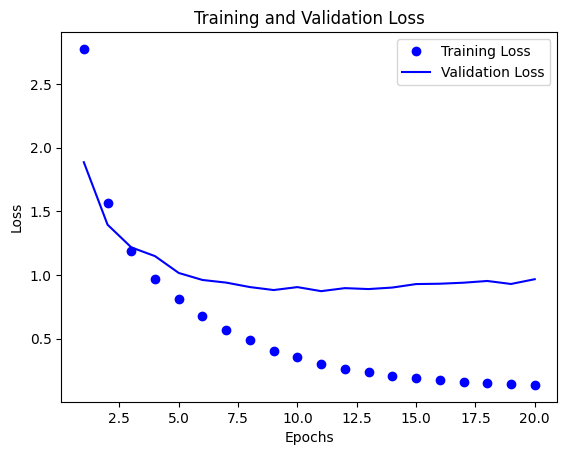

In [60]:
history_dict = history_dict.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "Training Loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

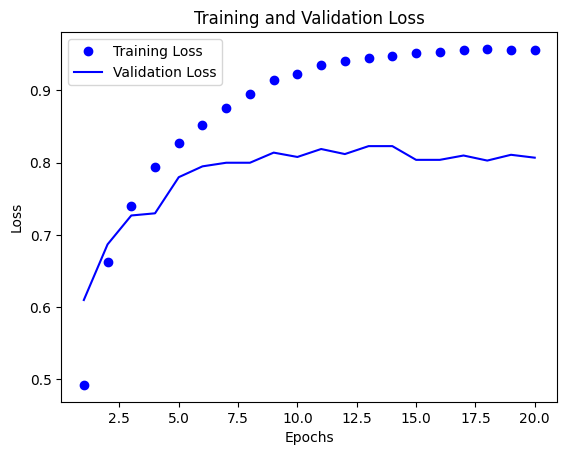

In [63]:
import matplotlib.pyplot as plt

loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "Training Loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [64]:
model.evaluate(test_data,test_label)

71/71 [==============================] - 1s 8ms/step - loss: 1.0277 - accuracy: 0.7912


[1.0276920795440674, 0.7911843061447144]